# Part 2 - 2 Point Stats

 - rigourous way to classify microstructure
 
 - 2 point statistic contain the first order distribution of how states are related
 
Let's start using PyMKS by creating some artificial microsturctures to analyze

In [2]:
import pymks

## Construct Artificial Microstructures

In [3]:
from pymks.datasets import make_microstructure

In [4]:
?make_microstructure

In [5]:
data = make_microstructure(n_samples=1, size=(101, 101), n_phases=2, grain_size=(20, 20))

In [6]:
print(data.shape)

(1, 101, 101)


In [7]:
print(data[0, :3, :3])

[[1 1 1]
 [1 1 1]
 [1 1 1]]


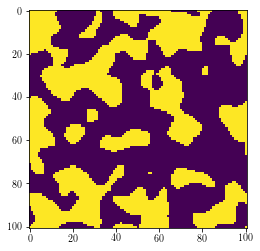

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data[0]);

## Lamellar Microstructure

In [9]:
data_lamellar = make_microstructure(n_samples=2, size=(101, 101), n_phases=2, grain_size=(95, 15))

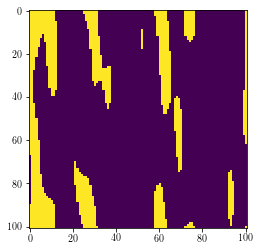

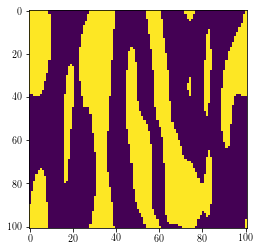

In [10]:
plt.imshow(data_lamellar[0])
plt.show()
plt.imshow(data_lamellar[1])
plt.show()

## Digital Signal -- Discretization

The next step is to deconstruct the microstructure into a digital signal,

 0 -> (1, 0)
 
 1 -> (0, 1)
 
 $m_j[h;s]$

In [11]:
import numpy as np

data = np.random.randint(2, size=(1, 3, 3))
print(data)
print(data.shape)

[[[0 0 0]
  [0 1 0]
  [1 0 0]]]
(1, 3, 3)


In [12]:
from pymks.bases import PrimitiveBasis

In [13]:
?PrimitiveBasis

In [14]:
basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_disc = basis.discretize(data)

In [15]:
print(data_disc.shape)

(1, 3, 3, 2)


In [16]:
print(data_disc[0, 0, 0])

[ 1.  0.]


## 2 Point Stats



![](stats.png)

Grey is $h=0$ and white is $h=1$ and this is our $j=0$ sample.

$$p_j[h, h';r] = \frac{1}{\Omega_j[r]} \sum_s m_j[h; s] m_j[h'; s + r]$$

$$m_0[0; [1, 1]] = 0$$

$$m_0[1; [2, 2]] = 1$$

$$p_0[0,0;[0,2]] = 2 / 16$$

$$p_0[0,0;[0,0]] = 7 / 16 $$

$$p_0[0,1;[-1,-2]] = 5 / 16$$

In [17]:
np.random.seed(0)

data_blob = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(30, 30), volume_fraction=[0.5, 0.5])
data_lamellar_v = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(100, 10), volume_fraction=[0.5, 0.5])
data_lamellar_h = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(10, 100), volume_fraction=[0.5, 0.5])


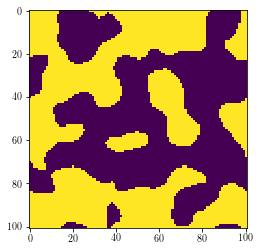

In [18]:
plt.imshow(data_blob[0]);

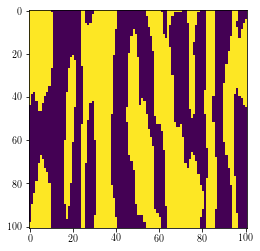

In [19]:
plt.imshow(data_lamellar_v[1]);

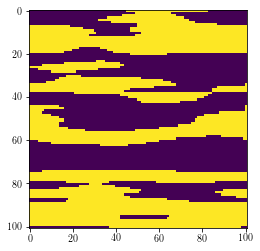

In [20]:
plt.imshow(data_lamellar_h[0]);

In [21]:
data_lamellar_v.shape

(50, 101, 101)

In [22]:
data = np.concatenate([data_blob, data_lamellar_v, data_lamellar_h], axis=0)

In [23]:
data.shape

(150, 101, 101)

In [24]:
from pymks.stats import correlate

basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_corr = correlate(data, basis=basis)

In [25]:
data_corr.shape

(150, 101, 101, 3)

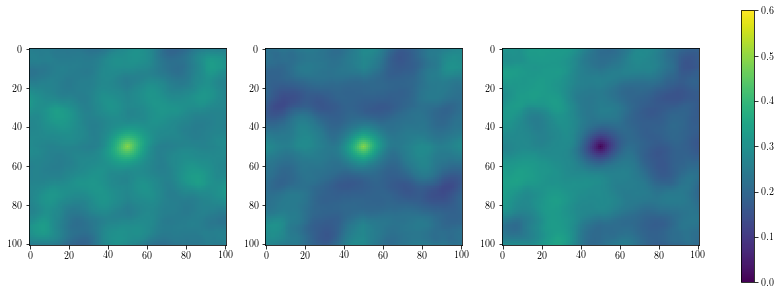

In [26]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[0, :, :, i], vmin=0.0, vmax=0.6, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [27]:
print(data_corr[0, :, :, 0] + data_corr[0, :, :, 1] + data_corr[0, :, :, 2] + data_corr[0, ::-1, ::-1, 2])

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


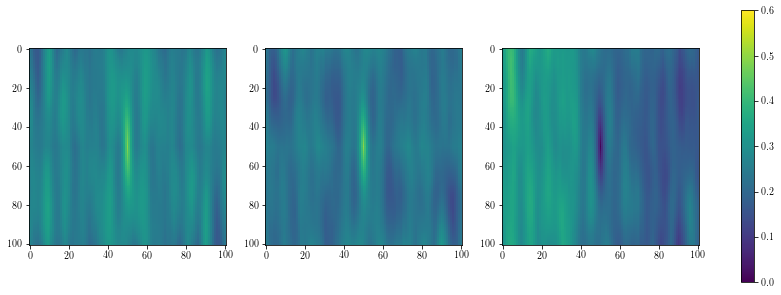

In [28]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[50, :, :, i], vmin=0.0, vmax=0.6, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

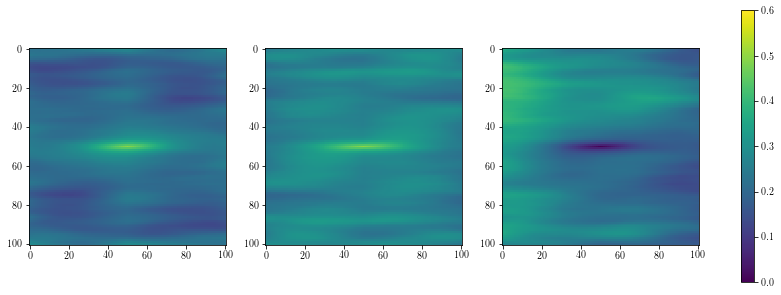

In [29]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[-1, :, :, i], vmin=0.0, vmax=0.6, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [30]:
data_corr.shape

(150, 101, 101, 3)

## Dimensionality Reduction

In [31]:
data_reshape = np.reshape(data_corr, (data_corr.shape[0], data_corr[0].size))

In [32]:
print(data_corr[148, 0, 0])
print(data_reshape[148, :3])

[ 0.23068051  0.25990004  0.14763552]
[ 0.23068051  0.25990004  0.14763552]


In [33]:
data_reshape.shape

(150, 30603)

In [34]:
data_mean = data_reshape - np.mean(data_reshape, axis=1)[:, None]

In [35]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=5)

In [36]:
data_pca = pca_model.fit_transform(data_mean)

In [37]:
data_pca.shape

(150, 5)

/home/wd15/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


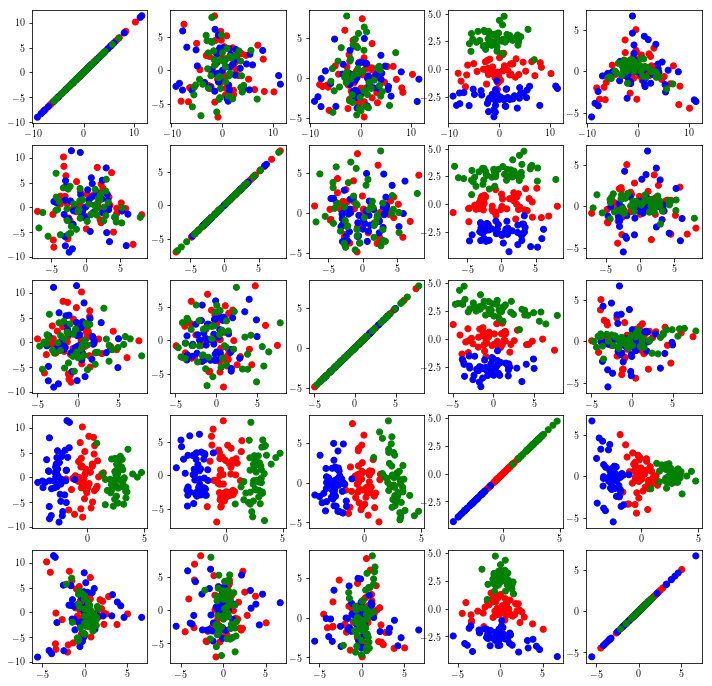

In [38]:
# NBVAL_IGNORE_OUTPUT

colors = ['r'] * 50 + ['b'] * 50 + ['g'] * 50

fig, axss = plt.subplots(5, 5)

for i, axs in enumerate(axss):
    for j, ax in enumerate(axs):
        ax.scatter(data_pca[:, i], data_pca[:, j], color=colors)
fig.set_size_inches(12, 12)
fig.show()

In [39]:
classification = np.concatenate([np.zeros(50), np.ones(50), np.ones(50) + 1])

In [40]:
# NBVAL_SKIP

from bqplot import pyplot as bq_plt

bq_plt.figure(title="Scatter Plot with colors")
bq_plt.scatter(data_pca[:, 2], data_pca[:, 3], color=classification)
bq_plt.show()

## Using Dask

In [42]:
%timeit correlate(data, basis=basis)

1 loop, best of 3: 8.37 s per loop


In [52]:
print(data.shape)

(150, 101, 101)


In [51]:
data_corr.shape

(150, 101, 101, 3)

In [74]:
import dask.array as da

data_da = da.from_array(data, chunks=(5, 101, 101))

print(data_da.shape)
print(data_da.chunks)

(150, 101, 101)
((5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (101,), (101,))


In [69]:
import dask.array as da
import dask.threaded
import dask.multiprocessing

def correlate_(data_):
    basis = PrimitiveBasis(n_states=2, domain=[0, 1])
    return correlate(data_, basis=basis)

data_da = da.from_array(data, chunks=(5, 101, 101))

map_ = da.map_blocks(correlate_, data_da, new_axis=1)

%timeit map_.compute(num_workers=2, get=dask.multiprocessing.get)

1 loop, best of 3: 5.06 s per loop


In [70]:
%timeit map_.compute(num_workers=4, get=dask.multiprocessing.get)

1 loop, best of 3: 2.78 s per loop


In [71]:
%timeit map_.compute(get=dask.threaded.get)

1 loop, best of 3: 1.41 s per loop


# Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(C=1)
model.fit(data_pca, classification)

In [ ]:
classification_pred = model.predict(data_pca)

In [ ]:
# NBVAL_IGNORE_OUTPUT

from sklearn.metrics import confusion_matrix

confusion_matrix(classification, classification_pred)

# Train Test Split

In [ ]:
X, y = data_mean, classification

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape)

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('pca', PCA(n_components=5)),
                  ('classifier', LogisticRegression())])

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# NBVAL_IGNORE_OUTPUT

mat = confusion_matrix(y_test, y_pred)
print(mat / mat.sum())